In [2]:
%load_ext autoreload
%autoreload 2
import torch
from torch.optim import Adam
from matplotlib import pyplot as plt
from src.utils import get_mnist_data, get_device
from src.models import ConvNN
from src.training_and_evaluation import *
from src.attacks import gradient_attack
from torch.nn.functional import cross_entropy
from typing import Tuple
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 2, part 2: Adversarial training 
In this notebook we perform adversarial training on the convolutional neural network from Part 1.

## Your task
Complete the missing code in this notebook. Make sure that all the functions follow the provided specification, i.e. the output of the function exactly matches the description in the docstring. 

Specifically, for this part you will have to implement the following functions / classes:  

**This notebook**
* The `loss_function_adversarial_training` used for adversarial training. 

## General remarks

Do not add or modify any code outside of the following comment blocks, or where otherwise explicitly stated.

``` python
##########################################################
# YOUR CODE HERE
...
##########################################################
```
After you fill in all the missing code, restart the kernel and re-run all the cells in the notebook.

The following things are **NOT** allowed:
- Using additional `import` statements
- Copying / reusing code from other sources (e.g. code by other students)

Note that plagiarising even a single project task will make you ineligible for the bonus this semester.

In [3]:
mnist_trainset = get_mnist_data(train=True)
mnist_testset = get_mnist_data(train=False)
device = get_device()

model = ConvNN()
model.to(device)

epochs = 2
batch_size = 128
test_batch_size = 1000  # feel free to change this
lr = 1e-3

opt = Adam(model.parameters(), lr=lr)

attack_args = {'norm': "2", "epsilon": 5}

### Loss function



In [4]:
losses, accuracies = train_model(model, mnist_trainset, batch_size, device,
                                 loss_function=loss_function_adversarial_training, optimizer=opt, 
                                 loss_args=attack_args, epochs=epochs)

INFO:root:Epoch 0 Iteration 0: Loss=3.972158670425415 Accuracy=0.0
INFO:root:Epoch 0 Iteration 100: Loss=2.302290916442871 Accuracy=0.0859375
INFO:root:Epoch 0 Iteration 200: Loss=2.3001914024353027 Accuracy=0.1484375
INFO:root:Epoch 0 Iteration 300: Loss=2.302583694458008 Accuracy=0.125
INFO:root:Epoch 0 Iteration 400: Loss=1.8723665475845337 Accuracy=0.328125
INFO:root:Epoch 1 Iteration 0: Loss=1.5505402088165283 Accuracy=0.4609375
INFO:root:Epoch 1 Iteration 100: Loss=0.8231002688407898 Accuracy=0.7265625
INFO:root:Epoch 1 Iteration 200: Loss=0.7434250712394714 Accuracy=0.7578125
INFO:root:Epoch 1 Iteration 300: Loss=0.9489906430244446 Accuracy=0.7109375
INFO:root:Epoch 1 Iteration 400: Loss=0.7306692004203796 Accuracy=0.71875


In [4]:
torch.save(model.state_dict(), "models/adversarial_training.checkpoint")

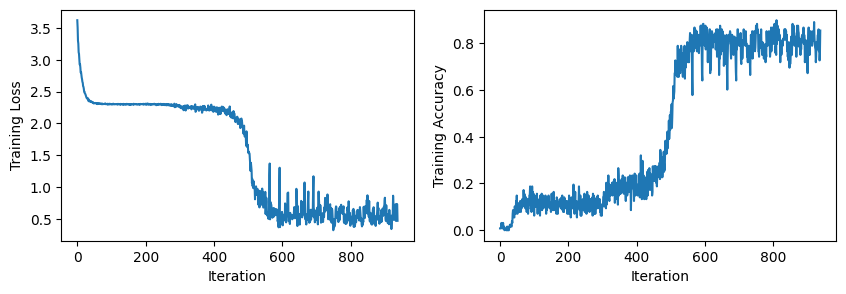

In [5]:
fig = plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.subplot(122)
plt.plot(accuracies)
plt.xlabel("Iteration")
plt.ylabel("Training Accuracy")
plt.show()

In [5]:
clean_accuracy = predict_model(model, mnist_testset, batch_size, device,
                               attack_function=None)

In [6]:
perturbed_accuracy = predict_model(model, mnist_testset, test_batch_size, device, 
                                   attack_function=gradient_attack, 
                                   attack_args=attack_args)

In [7]:
clean_accuracy

0.9164999723434448

In [8]:
perturbed_accuracy

0.4657000005245209